<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 4

## San Francisco Data

---

[San Francisco provides a wealth of data on the city to the public.](https://data.sfgov.org/) Project 4 is all about exploring this data and modeling interesting relationships with regression.

Project 4 is also much more open-ended than the previous projects. You are more responsible for finding things about the data that interest you, coming up with your own hypothesis about it, and reporting on the analysis you carry out. That being said, there are still specific requirements and restrictions on the type of models you will be constructing.

---

## Notes on the data

We have gone through the above website and pulled out a variety of different datasets that we think are particularly interesting. Some of the datasets are from external sources as well, but all are related to San Francisco. A high level overview of data folders is provided after the project requirements section.

**There is a lot of different data. You are _NOT_ expected to explore all of it or include all of it in analyses.** The point of the project is to focus on aspects of San Francisco that are particularly interesting to you from a modeling point of view. 

**The uncompressed data is a large filesize.** Even the compressed data is pretty large. The data is compressed into a .7z format which has one of the smallest filesizes available. You will likely need a 3rd party app to extract it. 

### Recommended Utilities for .7z
- For OSX [Keka](http://www.kekaosx.com/en/) or [The Unarchiver](http://wakaba.c3.cx/s/apps/unarchiver.html). 
- For Windows [7-zip](http://www.7-zip.org/) is the standard. 
- For Linux try the `p7zip` utility.  `sudo apt-get install p7zip`.

---

## Project requirements

**You will be performing 4 different sections of analysis on the San Francisco data.**

**Models must be regression. This means that your target variable needs to be numeric/continuous**

Do not perform classification models – this will be the topic of week 4.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 1. Choose a dataset or datasets of interest to you and perform EDA

---

1. Explain what the data is. This may include multiple csv files. Some of this data has hard to understand codes representing the variables. Nearly all data is pulled from https://data.sfgov.org/ so this is a very good resource for determining what the data is.
- Clean the data.
- Develop and state clearly a hypothesis about the data that you would want to test.
- Create some initial visualizations on the portions of the data relevant to your hypothesis.

In [92]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

fire_filepath = '../../../../Richarddea/DSI-SF-3_copy/datasets/san_francisco/san_francisco/fire_data/fire_incidents.csv'
sf_fire = pd.read_csv(fire_filepath)
assessor = '../../../DSI-SF-3_copy/datasets/san_francisco/san_francisco/assessor_office/assessor_data_2011_2012.csv'
sf_assr = pd.read_csv(assessor)

In [93]:
sf_assr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193758 entries, 0 to 193757
Data columns (total 36 columns):
PROPLOC       193758 non-null object
RP1NBRCDE     193746 non-null object
RP1PRCLID     193758 non-null object
RP1VOLUME     193758 non-null int64
RP1CLACDE     193749 non-null object
YRBLT         193758 non-null int64
BATHS         193758 non-null int64
BEDS          193758 non-null int64
ROOMS         193758 non-null int64
STOREYNO      193758 non-null int64
UNITS         193758 non-null int64
CHGDATE       193758 non-null int64
ZONE          167294 non-null object
CONSTTYPE     162811 non-null object
DEPTH         193758 non-null float64
FRONT         193758 non-null float64
SQFT          193758 non-null int64
FBA           193757 non-null float64
LAREA         193757 non-null float64
LOTCODE       68852 non-null object
REPRISDATE    0 non-null float64
RP1RECDAT1    193757 non-null float64
RP1DOCNO1     77742 non-null object
RP1DOCNO2     193757 non-null float64
RP1TRACDE 

In [94]:
column_names = ['property_location_code','neighborhood_code','neighborhood','volume_number','property_class_code',
                'year_built','number_of_bathrooms','number_of_bedrooms','number_of_rooms','number_of_stories','number_of_units',
                'char_change_date','zoning_code','construction_type','lot_depth','lot_frontage','property_sqft','basement_area',
                'lot_area','lot_code','prior_sale_date','recordation_date','document_1',
                'document_2','tax_rate_area_code','percentage_own','exempt_type','status_code',
                'misc_exempt_value','home_exempt_value','misc','current_sale_date','fixture_value',
                'improv_value','land_value','personal_prop_value']
sf_assr.columns = column_names
sf_assr.isnull().sum()

property_location_code         0
neighborhood_code             12
neighborhood                   0
volume_number                  0
property_class_code            9
year_built                     0
number_of_bathrooms            0
number_of_bedrooms             0
number_of_rooms                0
number_of_stories              0
number_of_units                0
char_change_date               0
zoning_code                26464
construction_type          30947
lot_depth                      0
lot_frontage                   0
property_sqft                  0
basement_area                  1
lot_area                       1
lot_code                  124906
prior_sale_date           193758
recordation_date               1
document_1                116016
document_2                     1
tax_rate_area_code           421
percentage_own                 1
exempt_type               105265
status_code               190676
misc_exempt_value              1
home_exempt_value              1
misc      

In [96]:
sf_assr = sf_assr.drop('zoning_code', 1)
sf_assr = sf_assr.drop('construction_type', 1)
sf_assr = sf_assr.drop('lot_code', 1)
sf_assr = sf_assr.drop('prior_sale_date', 1)
sf_assr = sf_assr.drop('document_1', 1)
sf_assr = sf_assr.drop('exempt_type', 1)
sf_assr = sf_assr.drop('status_code', 1)
sf_assr = sf_assr.drop('prior_sale_date', 1)


In [97]:
print sf_assr.columns
print sf_assr.columns[27]

Index([u'property_location_code', u'neighborhood_code', u'neighborhood',
       u'volume_number', u'property_class_code', u'year_built',
       u'number_of_bathrooms', u'number_of_bedrooms', u'number_of_rooms',
       u'number_of_stories', u'number_of_units', u'char_change_date',
       u'lot_depth', u'lot_frontage', u'property_sqft', u'basement_area',
       u'lot_area', u'recordation_date', u'document_2', u'tax_rate_area_code',
       u'percentage_own', u'misc_exempt_value', u'home_exempt_value', u'misc',
       u'current_sale_date', u'fixture_value', u'improv_value', u'land_value',
       u'personal_prop_value'],
      dtype='object')
land_value


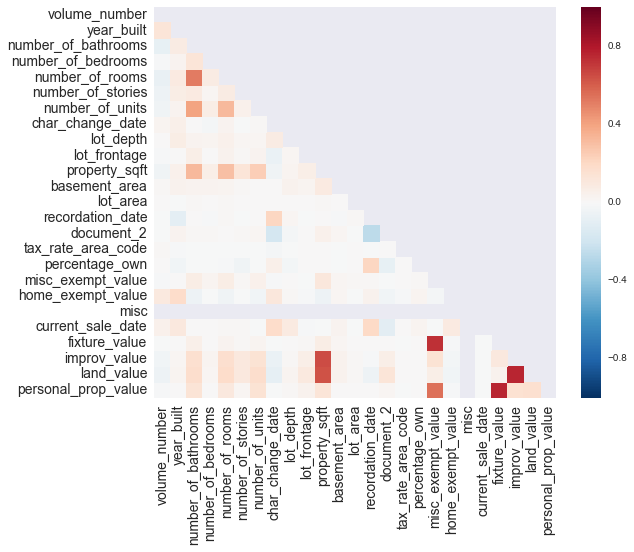

In [98]:
mean_corr = sf_assr[[x for x in sf_assr.columns if x not in 'Land_value']].corr()

plt.rcParams['figure.figsize']=(9,7)

mask = np.zeros_like(mean_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(mean_corr, mask=mask)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2. Construct and evaluate a linear regression model on the data

---

1. State the variables that are predictors in your linear regression and the target variable.
- Investigate and remove any outliers or other problems in your data. _This is a subjective process._
- Construct a linear regression model.
- Evaluate the model. How does the $R^2$ of the overall model compare to cross-validated $R^2$. What do the differences in $R^2$ mean?
  - Use test / train split
  - Use K-Folds
  - Compare and explain your results with both
- Visualize the evaluation metrics of your analysis in clear charts.
- Summarize your results in the context of your hypothesis. Frame this as if you are presenting to non-technical readers.


In [99]:
sf_assr.loc[sf_assr['lot_area'].isnull()]

sf_assr = sf_assr.drop(sf_assr.index[[193757]])

In [100]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

In [102]:
lm = linear_model.LinearRegression() 

target = 'land_value'
y = sf_assr[target]

X = sf_assr[['lot_area']]

print y.shape, X.shape

(193757,) (193757, 1)


In [103]:
model = lm.fit(X, y)

predictions = lm.predict(X)
predictions.shape

(193757,)

In [104]:
R2_score = model.score(X, y)
print R2_score

print model.coef_
print lm.intercept_
print mean_squared_error(y, predictions)

0.000107229197968
[ 0.16038311]
369495.729333
4.62151551018e+12


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2.2 Explain $R^2$ vs. mean squared error (MSE)

---

1. If you have negative $R^2$ values in cross-validation, what does this mean? 
2. Why can $R^2$ only be negative when the model is tested on new data?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3. Combine multiple sources of data and evaluate a model with regularized regression

---

**I recommend having many predictors to see benefits from regularization methods, but it's up to you.**

1. Use _NEW_ sources of data for this section. It should not be related to your analysis/hypothesis from section 1.
- Like in part 1, you should state a hypothesis and perform data cleaning and EDA _only_ on the relevant portions of your data. Don't waste time!
- Construct and evaluate different models with cross-validated $R^2$. Compare LinearRegression, Lasso, Ridge, and ElasticNet. Find the optimal hyperparameters (alpha, l1_ratio) using gridsearch.
- Report on which model is best, and why that might be the case (hint: does your data have multicollinearity? Irrelevant variables? Both?)
- Plot visuals that compare the performance of the four models.


In [108]:
sf_assr = sf_assr.drop('tax_rate_area_code',1)
sf_assr = sf_assr.drop('lot_area',1)
sf_assr = sf_assr.drop('misc',1)

columns = sf_assr.select_dtypes(['object']).columns
sf_assr = sf_assr.drop(columns,inplace=False,axis=1)

target = sf_assr["land_value"]
pred = sf_assr.drop('land_value', 1)
pred.shape

(193757, 21)

In [109]:
pred = (pred - pred.mean()) / pred.std()
pred.isnull().sum()

volume_number          0
year_built             0
number_of_bathrooms    0
number_of_bedrooms     0
number_of_rooms        0
number_of_stories      0
number_of_units        0
char_change_date       0
lot_depth              0
lot_frontage           0
property_sqft          0
basement_area          0
recordation_date       0
document_2             0
percentage_own         0
misc_exempt_value      0
home_exempt_value      0
current_sale_date      0
fixture_value          0
improv_value           0
personal_prop_value    0
dtype: int64

In [110]:
from sklearn import linear_model
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
sf_assr_norm = StandardScaler()
predictor_standard_scaler = sf_assr_norm.fit_transform(pred)
predictor_col = dict(enumerate(pred.columns))
predictor_col

lr = LinearRegression()

lr.fit(pred, target)
scores = cross_val_score(lr, pred, target, cv=25)

print scores

[  2.51621256e-01   7.33009512e-01   6.33086065e-01   1.25861550e-01
   3.06670077e-01   2.41527420e-01   1.87344244e-01   3.30911094e-01
   3.66966869e-01   5.67732310e-01  -2.89433484e-02  -1.07136736e+01
   3.68947284e-01   4.20845475e-01  -1.22390695e+00  -2.58921978e+00
   5.39005963e-01   6.12497717e-01   1.91278231e-01   3.45751991e-01
   5.50785817e-01  -6.87191459e+01  -1.24999451e-01   2.25330987e-01
   2.54021287e-01]


In [111]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from __future__ import division

target = sf_assr["land_value"]
pred = sf_assr.drop('land_value', 1)

X_rest = pred
X_cat = np.log1p(y).values

y = target
y_log = np.log1p(y).values

X = np.hstack((X_rest, X_cat))

X_train, X_test, y_train, y_test = train_test_split(X, y_log)

first_reg = LinearRegression()
first_reg.fit(X_train, y_train)
y_pred = first_reg.predict(X_test)

ridge_prices = RidgeCV(store_cv_values=False)
ridge_prices.fit(X_train, y_train)

y_train_ridge_pred = ridge_prices.predict(X_train)
y_test_ridge_pred = ridge_prices.predict(X_test)



ValueError: all the input arrays must have same number of dimensions

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4. Conduct another, different analysis and report on it

---

1. Combining multiple sources of data (csv files) is required.
- Perform EDA and cleaning on relevant data.
- Construct and compare different regression models with cross-validation.
- Plot descriptive visuals you think are useful for understanding the data.
- Report on your findings.

This section is just another analysis like the first sections, but is more open-ended in what models you decide to build and why. Don't feel obligated to try every out every regularized regression model (though it doesn't hurt). 


In [112]:
columns = sf_assr.select_dtypes(['object']).columns
sf_assr_2 = sf_assr.drop(columns,inplace=False,axis=1)

target_2 = sf_assr["property_sqft"]
pred_2 = sf_assr.drop('property_sqft', 1)
pred_2.shape

(193757, 21)

In [113]:
pred_2 = (pred_2 - pred_2.mean()) / pred_2.std()

In [114]:
sf_assr_norm_2 = StandardScaler()
pred_standard_scaler_2 = sf_assr_norm.fit_transform(pred_2)
pred_col = dict(enumerate(pred_2.columns))
pred_col

lr.fit(pred_2, target)
scores = cross_val_score(lr, pred_2, target, cv=10)

print scores

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.2 Ploting GridSearch with Lasso, Ridge, or Elasticnet
---
1. Using the gridsearch results, plot your score in relation to your parameters.
1. Plot the effect on your coefficients given alpha.
1. Plot any other parameter change to visualize the impact of any other hyperparameter.

It's helpful to understand the impact of parameters used in Gridsearch, and that you are comfortable working with the data that is generated for reporting to explore the results visually.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Bias-variance tradeoff

---

1. Select San Francisco data of your choice and construct a regularized regression model (this can be data from an earlier analysis if you like). Ideally the model should actually improve across regularization strengths...
- Gridsearch the regularization parameters to find the optimal.
- Plot the regularization parameter against the cross-validated $R^2$.
- Explain how regularization and regularization strength is related to the bias-variance tradeoff.


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.1 Calculate the approximated $\text{bias}^2$ and variance across regularization strengths.

---

You can obviously use my code from the bias-variance lab to do this. 

Plot the bias and variance change _with_ the cross-validated $R^2$. 

You'll need to scale these values somehow to put them on the same chart (I recommend (MinMaxScaler)[http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html] to put $\text{bias}^2$ and variance on the same scale as cross-validated $R^2$.

<img src="http://imgur.com/HNPKfE8.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Custom regularized regression penalties

---

The $\lambda1$ and $\lambda2$ norm regularization penalties (Lasso and Ridge) are the most commonly used regularization penalties. They have a solid foundation in statistics and evidence of effectiveness. However, these are not the only possible penalties for regression – sometimes new, customized penalties give additional performance and predictive power to models depending on the context.


**Devise of and implement a penalized regression for San Francisco data.** What is your rationale – why would this be useful? How does it perform compared to the standard Ridge, Lasso, and Elastic Net penalties?

## Statistics, Biases, and Hypothesis Testing

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Biases 

---
A new food ordering smartphone app incentivizes its users to invite their friends by offering them free orders for each friend that signs up
- What biases are being caused here?
- How would you measure the success of such a program?
- Rephrase this question to be unbiased
- Many people have said that there is a need for stricter laws on dangerous weapons. Do you agree?

### 7. Biases Answers ###

The bias is that it's only attracting users that are using it for free orders and not actual customers. 

Success can be measured by the number of users that joined the app from the free orders and are coming back to re-order more food using this app.

Do you agree that there is a need for stricter law on dangerous weapons?
    - when you add that many people have said it, it makes the person that you are asking bias as they may 
      agree since they do not want to be out of the norm.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Hypothesis Testing 

---

For the health/mortality data that Ferris used in class: 
- Generate summary statistics, histogram plots, cdf plots, and confidence intervals for two columns of your choice and a correlation matrix across all
- Using what you generated, provide short summaries of each column describing the data
- Is there a difference in mortality between smokers, nonsmokers?
- If national average weight is 85 pounds, is our weight average significantly different?
- Until now, we’ve only asked is it different. This is called a two sided test. 
    - What if we want to know if its less than or greater than? This is called a one sided test. We can calculate this from the result of a two sided. You divide your p value in half and check if your t statistic is positive or negative Greater than: p/2 < confidence level and t > 0 and Less-than: p/2 < confidence level and t < 0.
    

- If national average weight is 85 pounds, is our weight average statistical significantly less?

In [115]:
import matplotlib as plt
%matplotlib inline

health_data = pd.read_csv('http://assets.datacamp.com/blog_assets/chol.txt', sep=' ')


In [116]:
health_data.head()

,AGE,HEIGHT,WEIGHT,CHOL,SMOKE,BLOOD,MORT
0,20,176,77,195,nonsmo,b,alive
1,53,167,56,250,sigare,o,dead
2,44,170,80,304,sigare,a,dead
3,37,173,89,178,nonsmo,o,alive
4,26,170,71,206,sigare,o,alive


In [117]:
health_data.corr()

,AGE,HEIGHT,WEIGHT,CHOL
AGE,1.000000,-0.274894,0.053034,0.454691
HEIGHT,-0.274894,1.000000,0.491970,-0.287539
WEIGHT,0.053034,0.491970,1.000000,-0.034337
CHOL,0.454691,-0.287539,-0.034337,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117c2e250>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d973110>]], dtype=object)

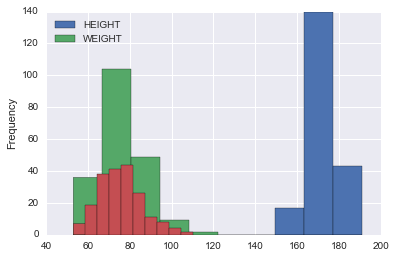

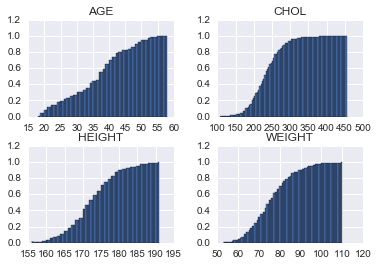

In [118]:
health_data[['HEIGHT', 'WEIGHT']].plot.hist()
health_data['WEIGHT'].plot.hist()
health_data.hist(cumulative=True, normed=1, bins=100)

In [119]:
import numpy as np
import scipy
height_mean = np.mean(health_data['HEIGHT'])
height_sigma = np.std(health_data['HEIGHT'])
weight_mean = np.mean(health_data['WEIGHT'])
weight_sigma = np.std(health_data['WEIGHT'])
print scipy.stats.norm.interval(.95, loc=height_mean, scale=height_sigma) 
print scipy.stats.norm.interval(.95, loc=weight_mean, scale=weight_sigma) 

(159.10645794714111, 185.59354205285888)
(55.470135659365447, 96.299864340634571)
